In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dash

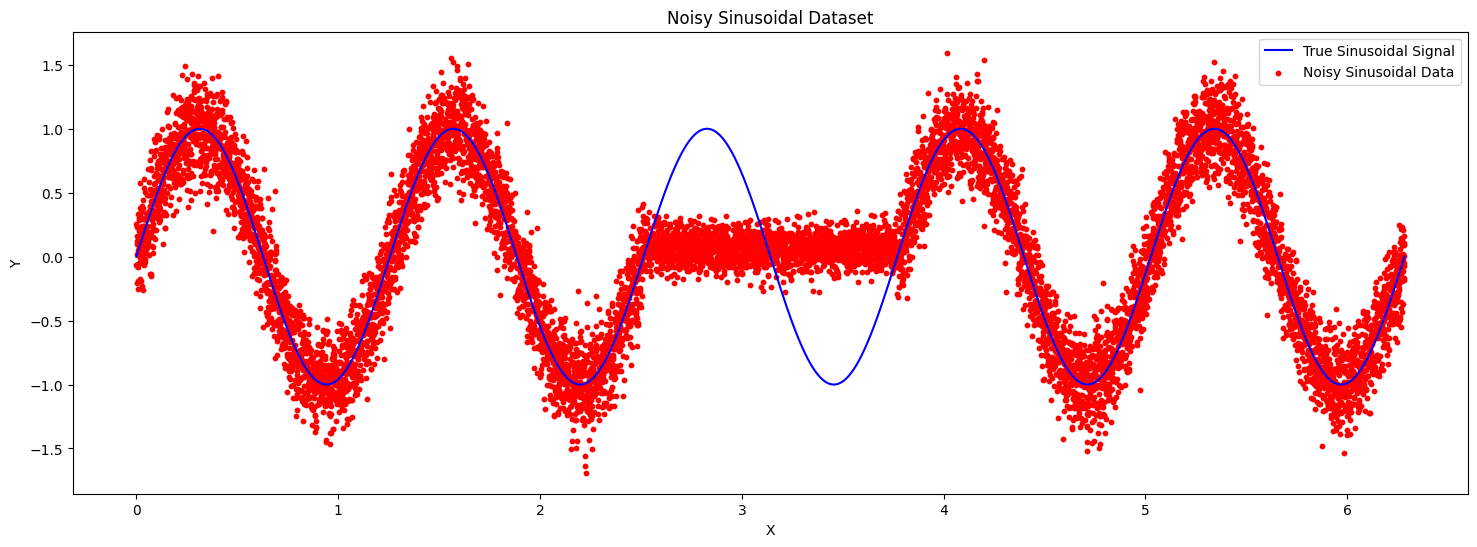

In [3]:
from data_selector.data.create_test_dataset import generate_noisy_sinusoidal, flatten_signal

# Example usage
num_samples = 10000
frequency = 5
noise_level = 0.2  # Adjust the noise level here

x, y_noisy = generate_noisy_sinusoidal(num_samples, frequency, noise_level)
y_flattened = flatten_signal(y_noisy, int(2/5*len(y_noisy)), int(3/5*len(y_noisy)))  # Adjust the start and end indices here

# Plotting the dataset
plt.figure(figsize=(18, 6))
plt.plot(x, np.sin(frequency * x), label='True Sinusoidal Signal', color='blue')
plt.scatter(x, y_flattened, label='Noisy Sinusoidal Data', color='red', s=10)
plt.title('Noisy Sinusoidal Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [4]:
df = pd.DataFrame({'x': x, 'y': y_flattened, 'z':np.sin(frequency * x)})

In [5]:
from data_selector.dash_lasso_data_selector import DashLassoDataSelector

# Create a Dash app instance
app = dash.Dash(__name__)

# Create a DashLassoDataSelector instance and run it
dash_app = DashLassoDataSelector(df, app, fig_size=(1600, 600), marker_size=5,port=8000)
dash_app.run()

In [11]:
dash_app.selected_data

,x,y,z
0,0.000000,-0.068010,0.000000
1,0.000628,0.252302,0.003142
2,0.001257,0.017403,0.006284
3,0.001885,0.100484,0.009426
4,0.002514,0.125377,0.012567
...,...,...,...
1434,0.901099,-0.848018,-0.978674
1436,0.902356,-0.752045,-0.979945
1437,0.902984,-0.876696,-0.980566
1446,0.908639,-0.753625,-0.985721


In [12]:
dash_app.confirmed_data

,x,y,z
0,0.000000,-0.068010,0.000000
1,0.000628,0.252302,0.003142
2,0.001257,0.017403,0.006284
3,0.001885,0.100484,0.009426
4,0.002514,0.125377,0.012567
...,...,...,...
1434,0.901099,-0.848018,-0.978674
1436,0.902356,-0.752045,-0.979945
1437,0.902984,-0.876696,-0.980566
1446,0.908639,-0.753625,-0.985721


In [13]:
dash_app.all_confirmed_data

{1:              x         y         z
 0     0.000000 -0.068010  0.000000
 1     0.000628  0.252302  0.003142
 2     0.001257  0.017403  0.006284
 3     0.001885  0.100484  0.009426
 4     0.002514  0.125377  0.012567
 ...        ...       ...       ...
 1434  0.901099 -0.848018 -0.978674
 1436  0.902356 -0.752045 -0.979945
 1437  0.902984 -0.876696 -0.980566
 1446  0.908639 -0.753625 -0.985721
 1447  0.909268 -0.817084 -0.986245
 
 [1390 rows x 3 columns]}

In [15]:
#transform all selected data into one dataframe
selected_data = pd.concat([dash_app.all_confirmed_data[i] for i in list(dash_app.all_confirmed_data.keys())])
selected_data

,x,y,z
0,0.000000,-0.068010,0.000000
1,0.000628,0.252302,0.003142
2,0.001257,0.017403,0.006284
3,0.001885,0.100484,0.009426
4,0.002514,0.125377,0.012567
...,...,...,...
1434,0.901099,-0.848018,-0.978674
1436,0.902356,-0.752045,-0.979945
1437,0.902984,-0.876696,-0.980566
1446,0.908639,-0.753625,-0.985721
